In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick


%matplotlib inline 

In [2]:
import earth_model.earth_model as earth_model

## PREM's density parameterisation

Some blurb...

$$
\rho(r) = \left\{
\begin{array}{ll}
      \rho_{0,0} + \rho_{0,1}r + \rho_{0,2}r^2 + \rho_{0,3}r^3 & r\leq 1221.5 \; \mathrm{km} \\
      \rho_{1,0} + \rho_{1,1}r + \rho_{1,2}r^2 + \rho_{1,3}r^3 & 1221.5\leq r\leq 3480.0 \; \mathrm{km}\\
      \vdots & \vdots \\
      \rho_{12,0} + \rho_{12,1}r + \rho_{12,2}r^2 + \rho_{12,3}r^3 & 6368.0\leq r\leq 6371.0 \; \mathrm{km} \\
\end{array} 
\right.
$$

In [3]:
# This implements the PREM density model using 

r_earth = 6371 # km

density_params = np.array([[13.0885,  0.0000, -8.8381,  0.0000],
                           [12.5815, -1.2638, -3.6426, -5.5281],
                           [7.9565, -6.4761,  5.5283, -3.0807],
                           [7.9565, -6.4761,  5.5283, -3.0807],
                           [7.9565, -6.4761,  5.5283, -3.0807],
                           [5.3197, -1.4836,  0.0000,  0.0000],
                           [11.2494, -8.0298,  0.0000,  0.0000],
                           [7.1089, -3.8045,  0.00002,  0.0000],
                           [2.6910,  0.6924,  0.0000,  0.0000],
                           [2.6910,  0.6924,  0.0000,  0.0000],
                           [2.9000,  0.0000,  0.0000,  0.0000],
                           [2.6000,  0.0000,  0.0000,  0.0000],
                           [1.0200,  0.0000,  0.0000,  0.0000]])


# Turn range of polynomials from 0 - 1 to 0 - r_earth (makes mass easer)
# and puts density into kg/m^3
density_params[:,0] = density_params[:,0] * 1000
density_params[:,1] = (density_params[:,1] * 1000) / r_earth 
density_params[:,2] = (density_params[:,2] * 1000) / (r_earth**2)
density_params[:,3] = (density_params[:,3] * 1000) / (r_earth**3)


# All 14 discontiuities in PREM in km.
breakpoints = np.array([0.0, 1221.5, 3480.0, 3630.0, 5600.0, 5701.0, 5771.0,
                        5971.0, 6151.0, 6291.0, 6346.6, 6356.0, 6368.0, 6371.0])



prem = earth_model.Prem(breakpoints=breakpoints, density_params=density_params, 
                        r_earth=r_earth)

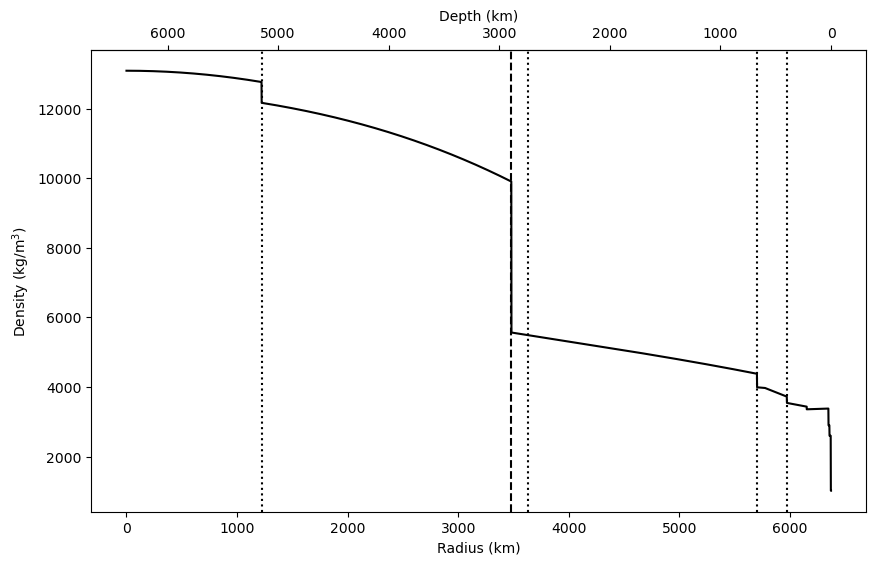

In [4]:
# What does it look like?
fig, ax = plt.subplots(figsize=(10,6))

rs = np.arange(0, 6371, 0.5)
ax.plot(rs, prem.density(rs), 'k')

ax.set_xlabel('Radius (km)')
ax.set_ylabel('Density (kg/m$^3$)')

ax.axvline(1221.5, ls=':', c='k')
ax.axvline(3480, ls='--', c='k')
ax.axvline(3630, ls=':', c='k')
ax.axvline(5701, ls=':', c='k')
ax.axvline(5971, ls=':', c='k')

secax = ax.secondary_xaxis('top', functions=(lambda x: 6371 - x, lambda x: 6371 - x))
secax.set_xlabel('Depth (km)')


plt.show()

## Mass and moment of inertia

$$ M = 4\pi \int_0^{R_{e}} \rho(r) r^2 \,\mathrm{d}r.$$

Moment of inertia:

$$I = \frac{2}{3} 4\pi \int_0^{R_{e}} \rho(r) r^4 \,\mathrm{d}r.$$

Mass of the Earth is: 5.973178452676284e+24 kg
Earth's moment of inertia is:  8.020207731256643e+37 kg m^2
I/MR**2: 0.3307995553696299


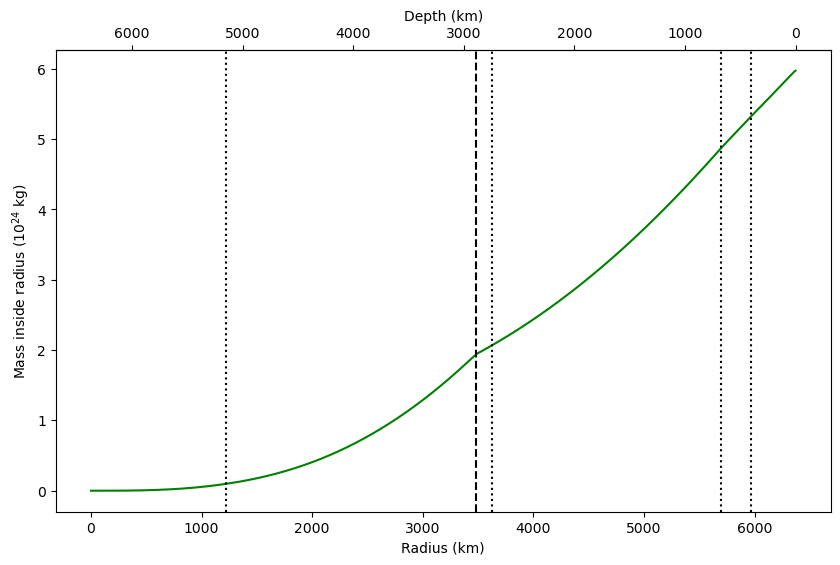

In [5]:
print("Mass of the Earth is:", prem.mass(prem.r_earth), "kg")
print("Earth's moment of inertia is: ", prem.moment_of_inertia(prem.r_earth)[0], "kg m^2")
print("I/MR**2:", prem.moment_of_inertia(prem.r_earth)[1])

# What does it look like?
fig, ax = plt.subplots(figsize=(10,6))

rs = np.arange(0, 6371, 0.5)
ax.plot(rs, prem.mass(rs)/1e24, 'g')

ax.set_xlabel('Radius (km)')
ax.set_ylabel('Mass inside radius ($10^{24}$ kg)')

ax.axvline(1221.5, ls=':', c='k')
ax.axvline(3480, ls='--', c='k')
ax.axvline(3630, ls=':', c='k')
ax.axvline(5701, ls=':', c='k')
ax.axvline(5971, ls=':', c='k')

secax = ax.secondary_xaxis('top', functions=(lambda x: 6371 - x, lambda x: 6371 - x))
secax.set_xlabel('Depth (km)')

plt.show()

## Gravity and pressure

$$g(r) = \frac{G M(r)}{r^2} $$

$$P(r) = \int_{R_e}^r -g(r) \rho(r) \,\mathrm{d}r $$

Surface gravity: 9.821911198154556 m/s^2
Pressure at center of Earth: 364.090030472167 GPa
Pressure at CMB: 135.83753335912658 GPa
Gravitational potential at surface: -62.57539624344266 MJ/kg


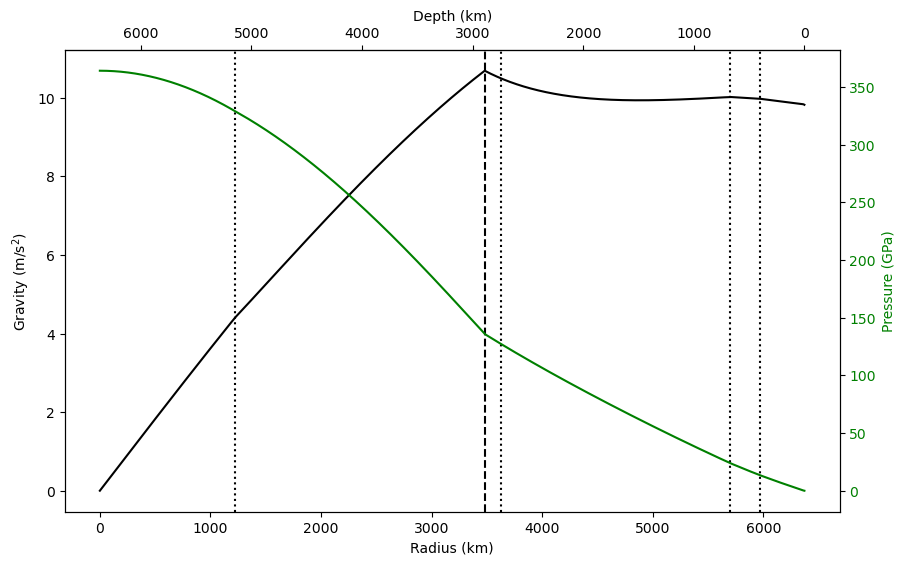

In [6]:
print("Surface gravity:", prem.gravity(6371), "m/s^2")
print("Pressure at center of Earth:", prem.pressure(0.0), "GPa")
print("Pressure at CMB:", prem.pressure(3480.0), "GPa")
print("Gravitational potential at surface:", prem.grav_potential(6371)*1E-6, "MJ/kg")

# What does it look like?
fig, ax = plt.subplots(figsize=(10,6))

rs = np.arange(0, 6371, 0.5)
ax.plot(rs, prem.gravity(rs), 'k')

ax.set_xlabel('Radius (km)')
ax.set_ylabel('Gravity (m/s$^2$)')

ax2 = ax.twinx() 
ax2.plot(rs, prem.pressure(rs), 'g')
ax2.set_ylabel('Pressure (GPa)', color='g')
ax2.tick_params(axis='y', labelcolor='g')


ax.axvline(1221.5, ls=':', c='k')
ax.axvline(3480, ls='--', c='k')
ax.axvline(3630, ls=':', c='k')
ax.axvline(5701, ls=':', c='k')
ax.axvline(5971, ls=':', c='k')

secax = ax.secondary_xaxis('top', functions=(lambda x: 6371 - x, lambda x: 6371 - x))
secax.set_xlabel('Depth (km)')

plt.show()